# **ĐỀ TÀI: NHẬN DIỆN BỆNH VIÊM PHỔI BẰNG ẢNH X-RAY**

# **THƯ VIỆN** 

In [21]:
import keras
from keras.models import Sequential
from glob import glob
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPool2D, Conv3D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# **LOAD MODEL**

In [8]:
labels = {0: 'NORMAL',
          1: 'PNEUMONIA'}
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# **KẾT NỐI GG-DRIVE**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **LOADING DATA**

In [6]:
train = get_training_data('/content/drive/MyDrive/chest_xray/train/')
test = get_training_data('/content/drive/MyDrive/chest_xray/test/')


In [9]:
picture_size = 150
folder_path = "/content/drive/MyDrive/chest_xray/"

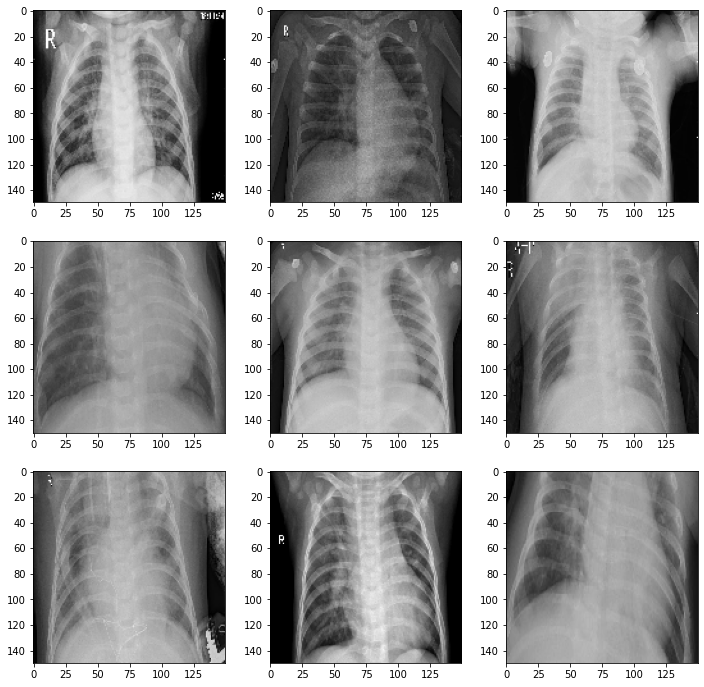

In [10]:
from keras.preprocessing.image import load_img, img_to_array
expression = 'PNEUMONIA'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# **MODEL CREATE**

In [11]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    

In [12]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [13]:
train_data_gen = ImageDataGenerator(rescale=1/255,
                                        rotation_range=0.2,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        zoom_range=0.2)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [14]:

train_set = train_data_gen.flow_from_directory(folder_path+"train",
                                              target_size = (150,150),
                                              color_mode = "grayscale",
                                              batch_size=10,
                                              class_mode='categorical',
                                              shuffle=True)

test_set = test_data_gen.flow_from_directory(folder_path+"test",
                                              target_size = (150,150),
                                              color_mode = "grayscale",
                                              batch_size=10,
                                              class_mode='categorical',
                                              shuffle=False)


Found 5242 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [15]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)


In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range = 30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip = True,
        vertical_flip=False)  

datagen.fit(x_train)

In [17]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [20]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 48 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/48
164/164 [==============================] - 381s 2s/step - loss: 0.3102 - accuracy: 0.8771 - lr: 0.0010
Epoch 2/48
164/164 [==============================] - 380s 2s/step - loss: 0.2547 - accuracy: 0.9092 - lr: 0.0010
Epoch 3/48
164/164 [==============================] - 369s 2s/step - loss: 0.2083 - accuracy: 0.9281 - lr: 0.0010
Epoch 4/48
164/164 [==============================] - 368s 2s/step - loss: 0.1952 - accuracy: 0.9319 - lr: 0.0010
Epoch 5/48
164/164 [==============================] - 376s 2s/step - loss: 0.1903 - accuracy: 0.9285 - lr: 0.0010
Epoch 6/48
164/164 [==============================] - 369s 2s/step - loss: 0.1766 - accuracy: 0.9441 - lr: 0.0010
Epoch 7/48
164/164 [==============================] - 364s 2s/step - loss: 0.1647 - accuracy: 0.9439 - lr: 0.0010
Epoch 8/48
164/164 [==============================] - 376s 2s/step - loss: 0.1555 - accuracy: 0.9464 - lr: 0.0010
Epoch 9/48
164/164 [==============================] - 371s 2s/step - loss: 0.1571 - accu

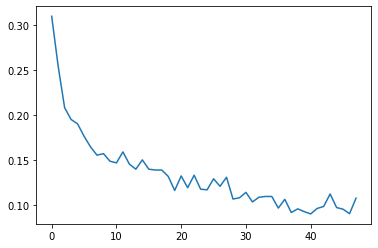

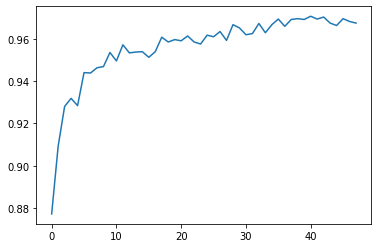

In [22]:
plt.plot(history.history["loss"], label ="Train loss")
plt.show()
plt.plot(history.history["accuracy"], label ="Accuracy")
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/QuocBao.h5')

In [23]:
predictions = model.predict_generator(test_set, steps=16, verbose=1)

16/16 [==============================] - 6s 320ms/step


In [24]:
predictions.shape

(160, 1)

In [25]:
print(test_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


Saving IM-0037-0001.jpeg to IM-0037-0001.jpeg
[[1.]]
Giá trị dự đoán:  NORMAL


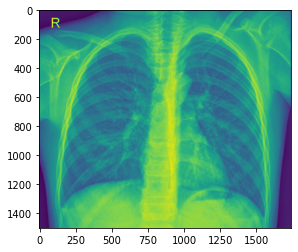

In [26]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path, color_mode = 'grayscale', target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])


Saving NORMAL2-IM-0340-0001.jpeg to NORMAL2-IM-0340-0001.jpeg
[[1.]]
Giá trị dự đoán:  NORMAL


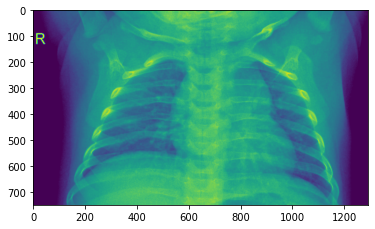

In [27]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path, color_mode = 'grayscale', target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])

Saving NORMAL2-IM-0283-0001.jpeg to NORMAL2-IM-0283-0001.jpeg
[[1.]]
Giá trị dự đoán:  NORMAL


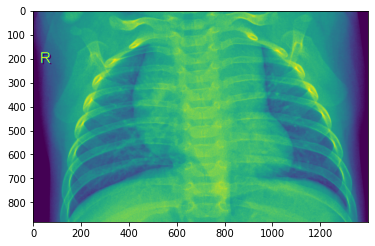

In [28]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path, color_mode = 'grayscale', target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', labels[np.argmax(y_predict)])